In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from bs4 import BeautifulSoup as Soup

In [3]:
map_kml = "Travel.kml"
with open('Travel.kml') as data:
    kml_soup = Soup(data, 'lxml-xml')
coord = kml_soup.find_all('coordinates')
coord_list=[]
for x in coord:
    coord_list.append(str(x))
#coord_list

name = kml_soup.find_all('name')
name_list = []
for x in name:
    name_list.append(str(x))

In [4]:
cor_col = ['Longitude', 'Latitude', 'Landmark']
df_col = pd.DataFrame(columns = cor_col)
for i, j in zip(range(len(coord_list)), range(2, len(name_list))):
    itm = coord_list[i]
    string_split = itm.split(',')
    #print(string_split[0][24:])
    cor1 = float(string_split[0][24:])
    cor2 = float(string_split[1])
    cor3 = name_list[j][6:-7]
    df_col.loc[i] = [cor1, cor2, cor3]

In [5]:
df_col

,Longitude,Latitude,Landmark
0,72.860127,19.000668,Sewri Mangrove Park
1,72.861633,18.995574,Lalbaugcha Raja
2,72.835874,18.990991,Nehru Science Centre
3,72.818873,18.990791,Nehru Planetarium
4,72.814797,18.990059,Haji Ali Dargah
5,72.808915,18.982728,Shree Mahalakshmi Temple
6,72.806366,18.977327,Malabar Point
7,72.793990,18.941096,Tower of Silence
8,72.807148,18.961818,Mumbai Chowpatty Beach
9,72.813882,18.954749,"Nariman Point, Mumbai, Maharashtra"


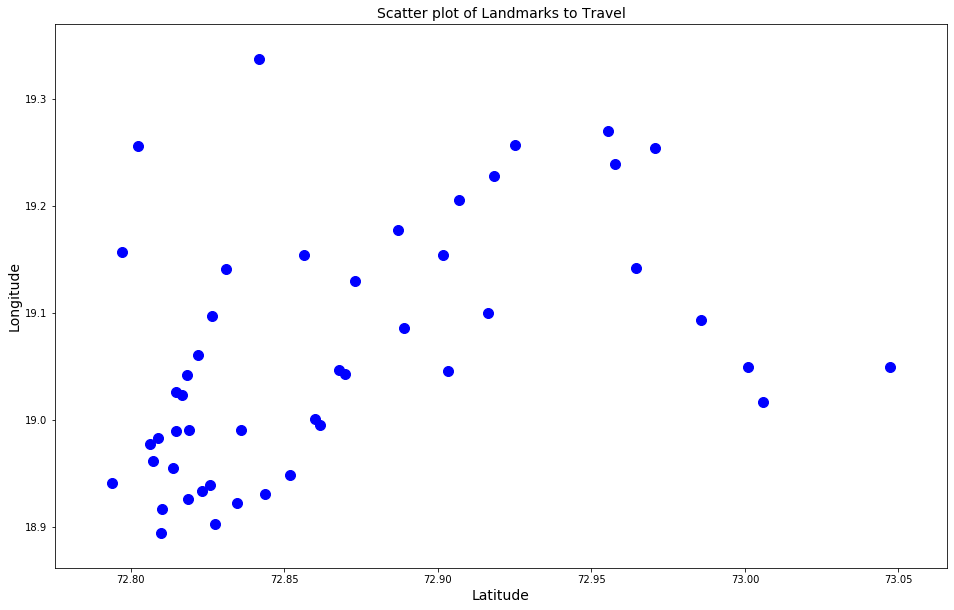

In [132]:
fig = plt.figure(figsize=(16,10))
plt.scatter(df_col['Longitude'], df_col['Latitude'], c = 'blue', s = 100)
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('Scatter plot of Landmarks to Travel', fontsize=14)
plt.show()

In [48]:
X = df_col[['Longitude','Latitude']].values


In [76]:
#K-Means (Eucliedian Distance)
from sklearn.cluster import KMeans 
km = KMeans(n_clusters=14, random_state=1 )
Km_pred = km.fit_predict(X)

In [77]:
Km_schedule = pd.concat([df_col.reset_index(), pd.DataFrame({'Cluster':Km_pred})], axis=1)
#days
Km_schedule.drop("index", axis = 1, inplace = True)

In [96]:
cond_list = [
    Km_schedule['Cluster'] == 0,
    Km_schedule['Cluster'] == 1,
    Km_schedule['Cluster'] == 2,
    Km_schedule['Cluster'] == 3,
    Km_schedule['Cluster'] == 4,
    Km_schedule['Cluster'] == 5,
    Km_schedule['Cluster'] == 6,
    Km_schedule['Cluster'] == 7,
    Km_schedule['Cluster'] == 8,
    Km_schedule['Cluster'] == 9,
    Km_schedule['Cluster'] == 10,
    Km_schedule['Cluster'] == 11,
    Km_schedule['Cluster'] == 12,
    Km_schedule['Cluster'] == 13,
]
options = ['Week 1 Sun', 'Week 1 Mon', 'Week 1 Tues', 'Week 1 Wed', 'Week 1 Thurs', 'Week 1 Fri', 'Week 1 Sat', 
           'Week 2 Sun', 'Week 2 Mon', 'Week 2 Tues', 'Week 2 Wed', 'Week 2 Thurs', 'Week 2 Fri', 'Week 2 Sat']
Km_schedule['Schedule'] = np.select(cond_list, options, default = 'black')

In [97]:
Km_schedule.sort_values(by=['Cluster'])

,Longitude,Latitude,Landmark,Cluster,Schedule
26,72.888977,19.086379,Juhu Beach,0,Week 1 Sun
32,72.916394,19.099685,Sunset Point,0,Week 1 Sun
9,72.813882,18.954749,"Nariman Point, Mumbai, Maharashtra",1,Week 1 Mon
7,72.793990,18.941096,Tower of Silence,1,Week 1 Mon
6,72.806366,18.977327,Malabar Point,1,Week 1 Mon
8,72.807148,18.961818,Mumbai Chowpatty Beach,1,Week 1 Mon
4,72.814797,18.990059,Haji Ali Dargah,1,Week 1 Mon
3,72.818873,18.990791,Nehru Planetarium,1,Week 1 Mon
5,72.808915,18.982728,Shree Mahalakshmi Temple,1,Week 1 Mon
37,72.925095,19.257601,Jamdar Pada Dam,2,Week 1 Tues


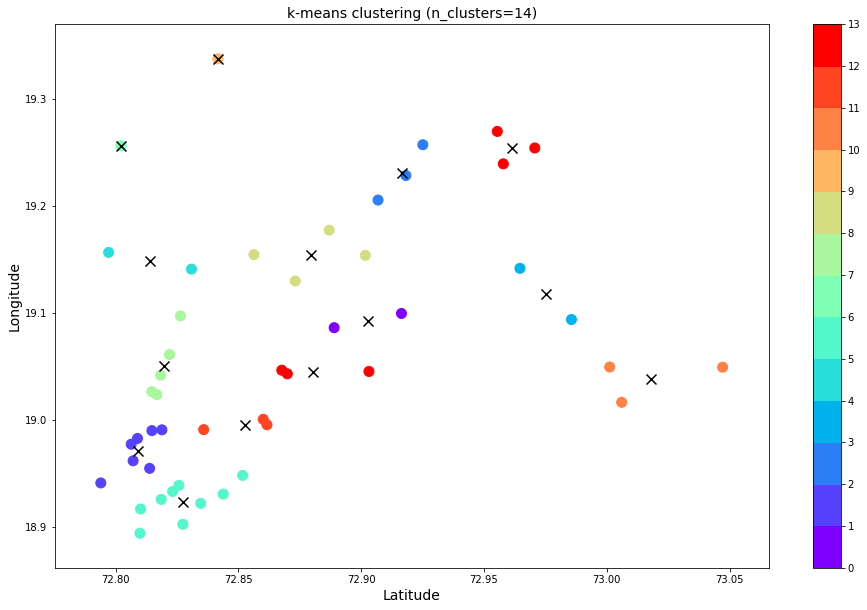

In [133]:
colormap = plt.cm.rainbow
normalize = matplotlib.colors.BoundaryNorm(np.arange(0,14,1), colormap.N)
fig = plt.figure(figsize=(16,10))
plt.scatter(Km_schedule['Longitude'], Km_schedule['Latitude'], c = Km_schedule['Cluster'], cmap = colormap, norm= normalize, s = 100)
plt.colorbar(ticks=np.linspace(0,13,14))
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=1, marker = "x");
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('k-means clustering (n_clusters=14)', fontsize=14)
plt.show()

In [86]:
#AgglomerativeClustering (Manhattan Distance)
from sklearn.cluster import AgglomerativeClustering
Aggl_C = AgglomerativeClustering(n_clusters=14, affinity = 'manhattan' , linkage = 'average')
Agg_pred = Aggl_C.fit_predict(X)

In [87]:
AgC_schedule= pd.concat([df_col.reset_index(), pd.DataFrame({'Cluster':Agg_pred})], axis=1)
#days
AgC_schedule.drop("index", axis = 1, inplace = True)

In [89]:
cond_list = [
    AgC_schedule['Cluster'] == 0,
    AgC_schedule['Cluster'] == 1,
    AgC_schedule['Cluster'] == 2,
    AgC_schedule['Cluster'] == 3,
    AgC_schedule['Cluster'] == 4,
    AgC_schedule['Cluster'] == 5,
    AgC_schedule['Cluster'] == 6,
    AgC_schedule['Cluster'] == 7,
    AgC_schedule['Cluster'] == 8,
    AgC_schedule['Cluster'] == 9,
    AgC_schedule['Cluster'] == 10,
    AgC_schedule['Cluster'] == 11,
    AgC_schedule['Cluster'] == 12,
    AgC_schedule['Cluster'] == 13,
]
options = ['Week 1 Sun', 'Week 1 Mon', 'Week 1 Tues', 'Week 1 Wed', 'Week 1 Thurs', 'Week 1 Fri', 'Week 1 Sat', 
           'Week 2 Sun', 'Week 2 Mon', 'Week 2 Tues', 'Week 2 Wed', 'Week 2 Thurs', 'Week 2 Fri', 'Week 2 Sat']
AgC_schedule['Schedule'] = np.select(cond_list, options, default = 'red')

In [90]:
AgC_schedule.sort_values(by=['Cluster'])

,Longitude,Latitude,Landmark,Cluster,Schedule
27,72.826448,19.097419,Infiniti Mall,0,Week 1 Sun
22,72.821968,19.061267,Sion Fort,0,Week 1 Sun
21,72.818359,19.041889,Bandra Sea View,0,Week 1 Sun
20,72.814780,19.026613,Bandra Fort,0,Week 1 Sun
19,72.816800,19.023712,Bandra Worli Sea Link,0,Week 1 Sun
0,72.860127,19.000668,Sewri Mangrove Park,1,Week 1 Mon
25,72.869919,19.043203,"Phoenix Marketcity, Mumbai",1,Week 1 Mon
24,72.903145,19.045433,Siddhivinayak Temple,1,Week 1 Mon
23,72.867682,19.046592,Cubic Mall,1,Week 1 Mon
1,72.861633,18.995574,Lalbaugcha Raja,1,Week 1 Mon


In [112]:
from sklearn.neighbors import NearestCentroid
clf = NearestCentroid(metric = 'manhattan')
clf.fit(X, Agg_pred)

NearestCentroid(metric='manhattan', shrink_threshold=None)

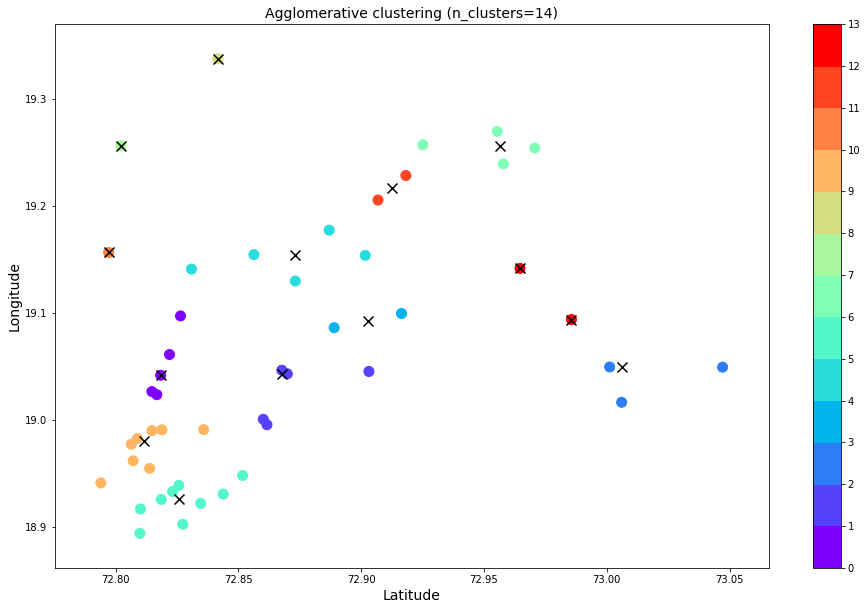

In [134]:
colormap = plt.cm.rainbow
normalize = matplotlib.colors.BoundaryNorm(np.arange(0,14,1), colormap.N)
fig = plt.figure(figsize=(16,10))
plt.scatter(AgC_schedule['Longitude'], AgC_schedule['Latitude'], c = AgC_schedule['Cluster'], cmap = colormap, norm= normalize, s = 100)
plt.colorbar(ticks=np.linspace(0,13,14))
centers = clf.centroids_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=1 ,marker = 'x');
plt.xlabel('Latitude', fontsize=14)
plt.ylabel('Longitude', fontsize=14)
plt.title('Agglomerative clustering (n_clusters=14)', fontsize=14)
plt.show()